In [1]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunction as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "./matrix/"

In [4]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

In [5]:
def make_plot(normsGradient_PR, normsGradient_HS, normsGradient_FR,
              relativeErrors_PR, relativeErrors_HS, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'DejaVu Sans',
            'weight': 'normal',
            'size': 20}
    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    # Title
    fig.suptitle(
            'Matrix Type  ' + type + ' Relative error and gradient norm')
    
    for i in range(len(relativeErrors_PR)):
        relativeErrors_PR[i] = [max(err, 1e-20) for err in relativeErrors_PR[i]]
    
        x = list(range(len(relativeErrors_PR[i])))
        axs[0].plot(x, relativeErrors_PR[i], label = "PR")
        axs[1].plot(x, normsGradient_PR[i], label = 'PR')
        
    for i in range(len(relativeErrors_HS)):
        relativeErrors_HS[i] = [max(err, 1e-20) for err in relativeErrors_HS[i]]
    
        x = list(range(len(relativeErrors_HS[i])))
        axs[0].plot(x, relativeErrors_HS[i], label = 'HS')
        axs[1].plot(x, normsGradient_HS[i], label = 'HS')
        
    for i in range(len(relativeErrors_FR)):
        relativeErrors_FR[i] = [max(err, 1e-20) for err in relativeErrors_FR[i]]
    
        x = list(range(len(relativeErrors_FR[i])))
        axs[0].plot(x, relativeErrors_FR[i], label = 'FR')
        axs[1].plot(x, normsGradient_FR[i], label = 'FR')
        
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

# Experiments on Matrix M1

In [6]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [7]:
f = nf.normFunction(M1)

In [8]:
initial_vector = f.init_x()

In [9]:
norm = la.norm(M1, ord=2) ** 2

PR beta

In [10]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [11]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [12]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [13]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [14]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [15]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [16]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [17]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [18]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

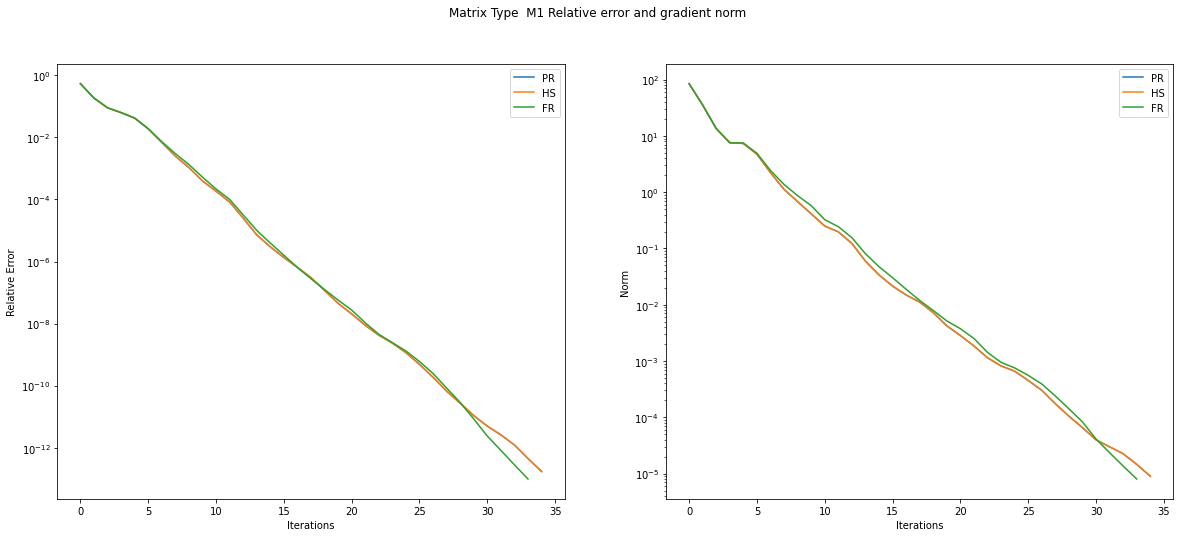

In [19]:
make_plot(gradientsCG_PR, gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M1', experiment_name='proviamo')

# Experiments on Matrix M2

In [20]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [21]:
f = nf.normFunction(M2)

In [22]:
initial_vector = f.init_x()

In [23]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [24]:
norm = la.norm(M2, ord=2) ** 2

PR beta

In [25]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [26]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [27]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [28]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [29]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [30]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [31]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [32]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

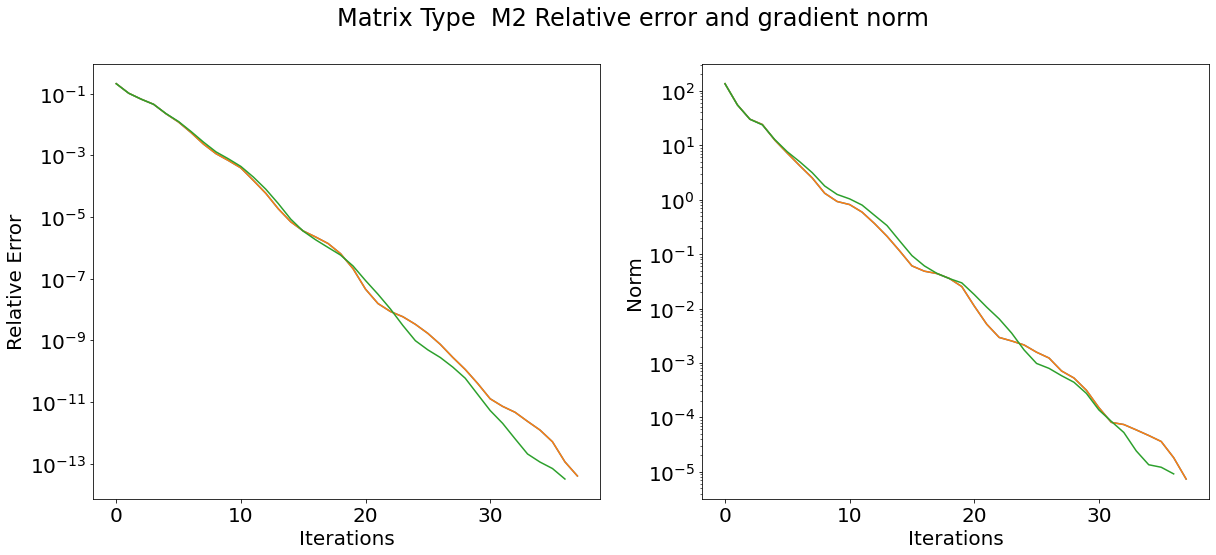

In [33]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M2', experiment_name='proviamo')

# Experiments on Matrix M3

In [34]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [35]:
f = nf.normFunction(M3)

In [36]:
initial_vector = f.init_x()

In [37]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [38]:
norm = la.norm(M3, ord=2) ** 2

PR beta

In [39]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [40]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [41]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [42]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [43]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [44]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [45]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [46]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

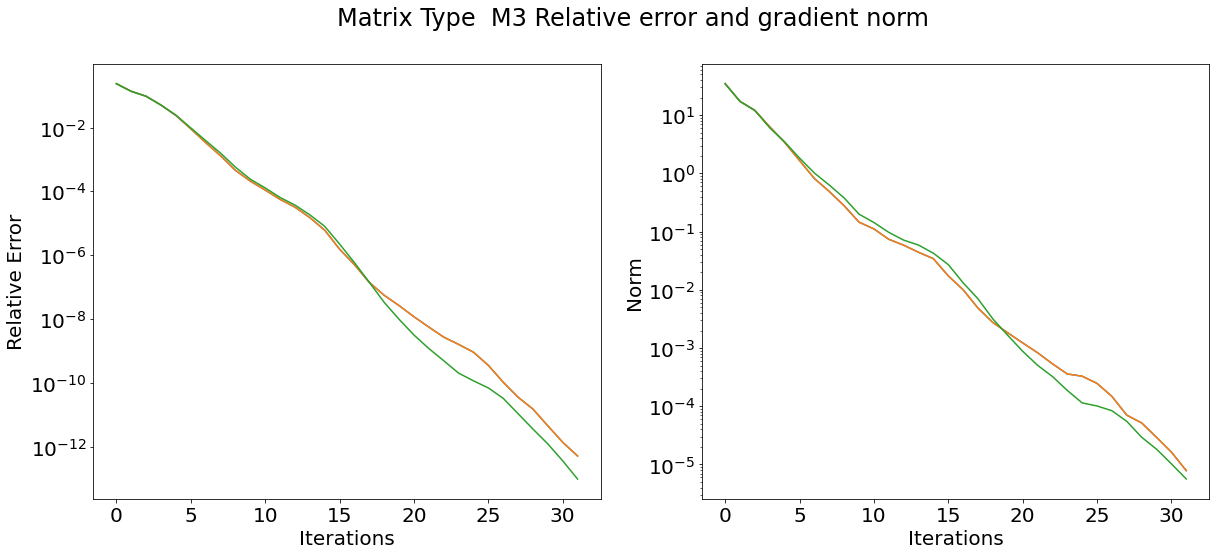

In [47]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M3', experiment_name='proviamo')

# Experiments on Matrix M4

In [48]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [49]:
f = nf.normFunction(M4)

In [50]:
initial_vector = f.init_x()

In [51]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [52]:
norm = la.norm(M4, ord=2) ** 2

PR beta

In [53]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [54]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [55]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [56]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [57]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [58]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [59]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [60]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

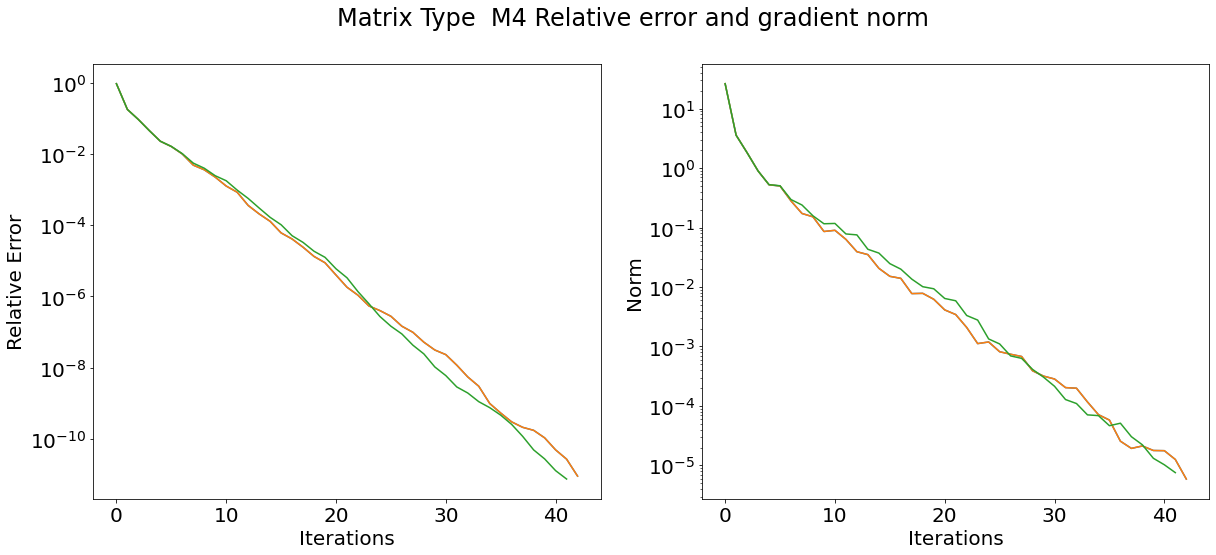

In [61]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M4', experiment_name='proviamo')

# Experiments on Matrix M5

In [62]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [63]:
f = nf.normFunction(M5)

In [64]:
initial_vector = f.init_x()

In [65]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [66]:
norm = la.norm(M5, ord=2) ** 2

PR beta

In [67]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [68]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [69]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [70]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [71]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [72]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [73]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [74]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

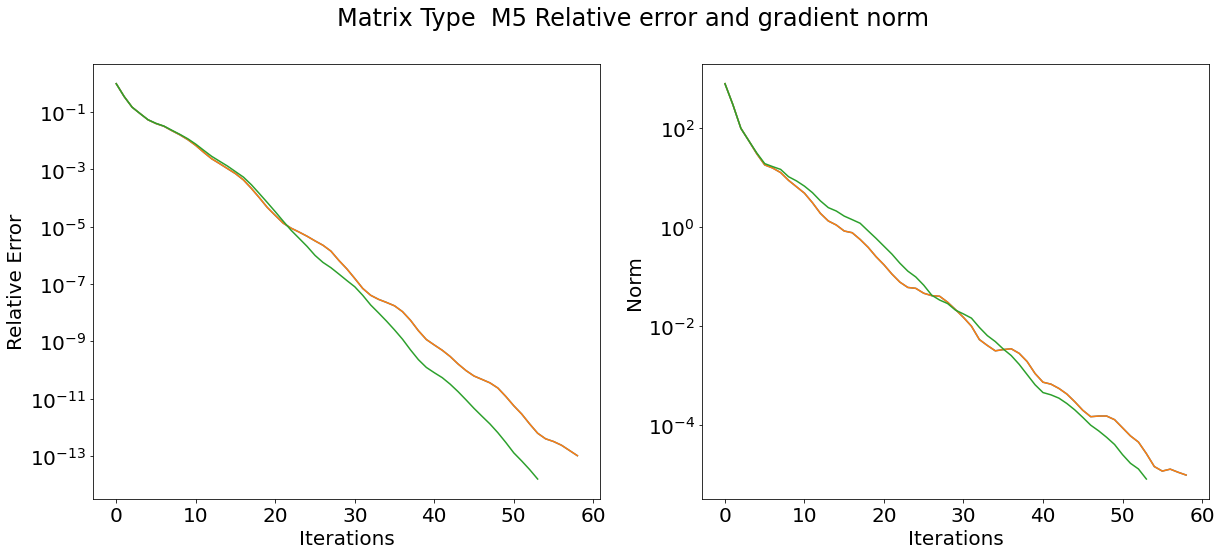

In [75]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M5', experiment_name='proviamo')